Minu kumari
task-2 -stock market prediction

importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [ ]:
tg = pd.read_csv("/content/archive (4).zip")

In [ ]:
tg.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
tg.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
tg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


sorting the data


In [ ]:
NAN = [(c, tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN, columns=['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [ ]:
srt=tg.sort_values(by='Date')
srt.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head(10)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


data visualization

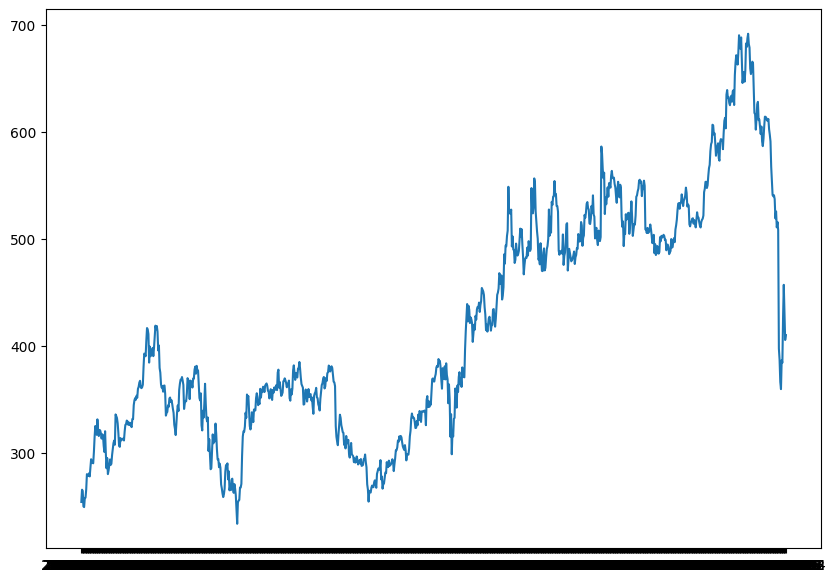

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
close_srt = srt['Close']
close_srt

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

Feature scalling(MinMax Scaler)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1, 1))
close_srt

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

Splitting the dataset

In [ ]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [ ]:
train_data.shape

(706, 1)

In [ ]:
test_data.shape

(303, 1)

convert an array of values into a dataset matrix

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

Reshapping of dataset

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(605, 100)
(605,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(202, 100)
(202,)


(None, None)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
x_train

array([[[0.04451626],
        [0.06954849],
        [0.06701469],
        ...,
        [0.32895744],
        [0.36152555],
        [0.34186674]],

       [[0.06954849],
        [0.06701469],
        [0.03542955],
        ...,
        [0.36152555],
        [0.34186674],
        [0.35285382]],

       [[0.06701469],
        [0.03542955],
        [0.03405342],
        ...,
        [0.34186674],
        [0.35285382],
        [0.34413837]],

       ...,

       [[0.45765709],
        [0.46604484],
        [0.48308251],
        ...,
        [0.5523907 ],
        [0.54380637],
        [0.53563706]],

       [[0.46604484],
        [0.48308251],
        [0.54992248],
        ...,
        [0.54380637],
        [0.53563706],
        [0.53897906]],

       [[0.48308251],
        [0.54992248],
        [0.53080975],
        ...,
        [0.53563706],
        [0.53897906],
        [0.54151287]]])

creating the stacked Lstm model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Prediction and checking performance

In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
9/9 [==============================] - 9s 384ms/step - loss: 0.0364 - val_loss: 0.0038
Epoch 2/60
9/9 [==============================] - 2s 214ms/step - loss: 0.0083 - val_loss: 0.0371
Epoch 3/60
9/9 [==============================] - 2s 168ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 4/60
9/9 [==============================] - 1s 166ms/step - loss: 0.0042 - val_loss: 0.0078
Epoch 5/60
9/9 [==============================] - 2s 168ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 6/60
9/9 [==============================] - 2s 170ms/step - loss: 0.0026 - val_loss: 0.0058
Epoch 7/60
9/9 [==============================] - 2s 170ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 8/60
9/9 [==============================] - 2s 170ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 9/60
9/9 [==============================] - 3s 288ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 10/60
9/9 [==============================] - 2s 168ms/step - loss: 0.0023 - val_loss: 0.0051
Epoch 11/60
9/9 [==

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

7/7 [==============================] - 0s 52ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

calculating the performance

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

382.7489177899535

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

580.151130326289

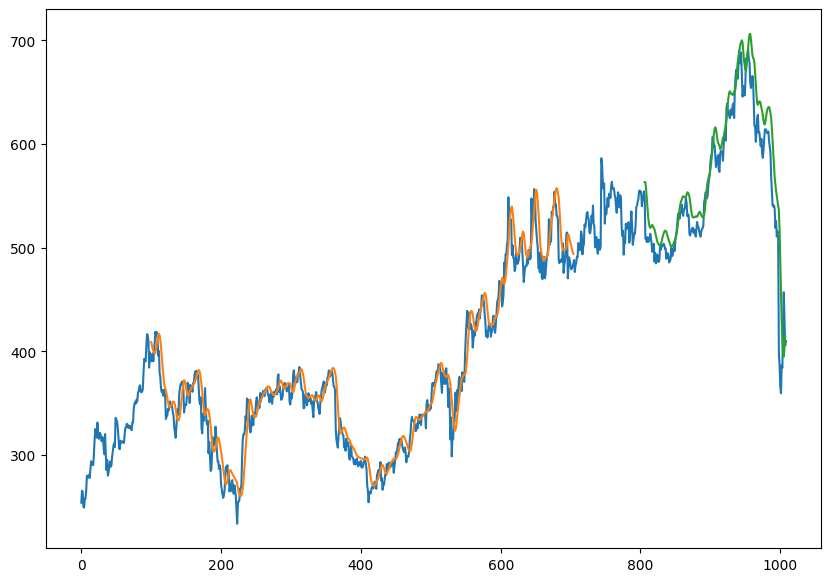

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction for next 30 days

In [ ]:
len(test_data)

303

In [ ]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 0)

In [ ]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[]

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    pred_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,pred_input))
    pred_input=pred_input.reshape((1, n_steps, 1))
    yhat = model.predict(pred_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    i=i+1
  else:
    pred_input = pred_input.reshape((1, n_steps,1))
    yhat = model.predict(pred_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1


print(lst_output)


ValueError: ignored

plotting last 130 days closing price

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(close_srt)

1009

In [ ]:
plt.figure(figsize=(1,101))
plt.plot(day_new,scaler.inverse_transform(close_srt[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: ignored

<Figure size 100x10100 with 0 Axes>

appending

1009


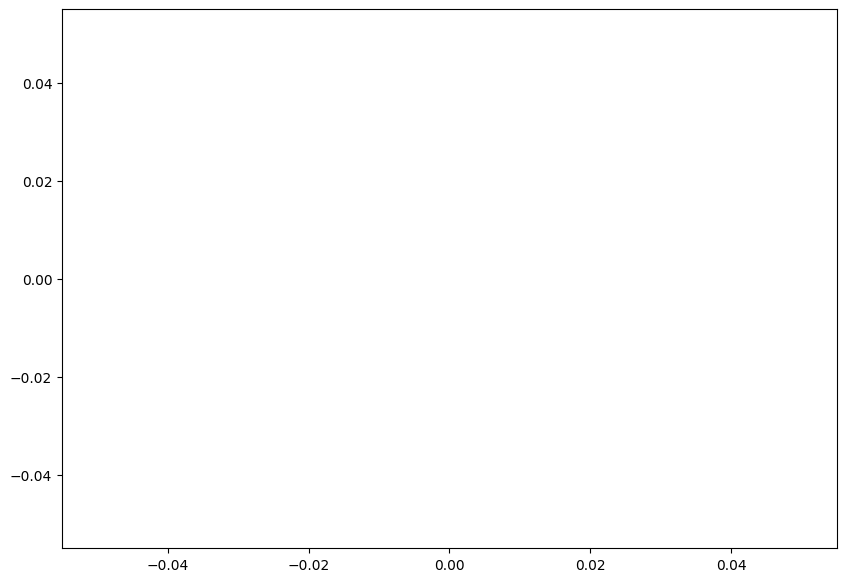

In [ ]:
df3=close_srt.tolist()
df3.extend(lst_output)
print(len(df3))
plt.figure(figsize=(10,7))
plt.plot(df3[1935:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


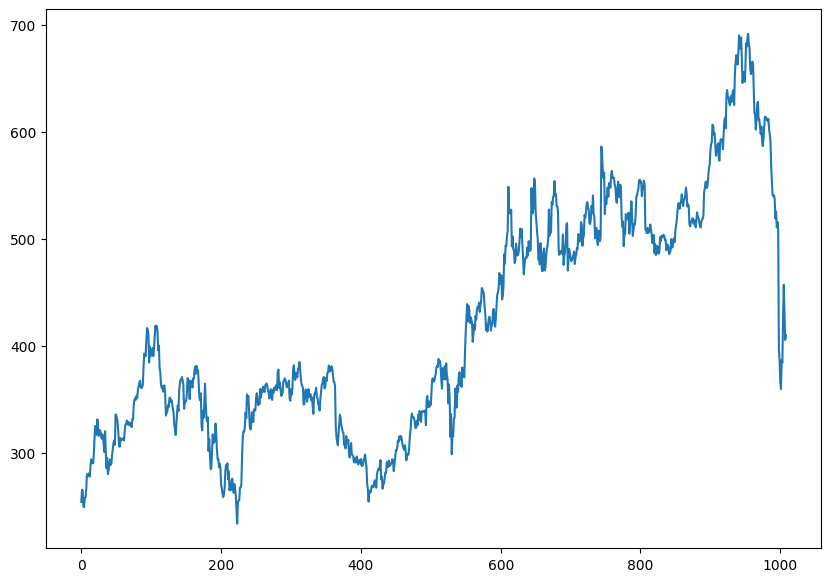

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3)